# TimeSeries Decomposition
- 시계열 분해를 진행한다.
- 모든 열에서 시계열 요소인 trend, seasonal, residual을 추출한다.
- 해당 데이터를 모두 저장한다. 

### 패키지 로딩

In [3]:
# Data Handling
import pandas as pd
import numpy as np

# Timeseries Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
plt.rcParams['figure.figsize'] = (20, 20)

# warning 제거
import warnings
warnings.filterwarnings('ignore')

### 데이터 로딩

In [5]:
### 데이터 로딩
train = pd.read_csv("C:/dust/data/train.csv")
### ffill로 데이터 보간
train = train.fillna(method = 'ffill')
### 필요없는 칼럼 제거
train.drop(columns = ["Unnamed: 0","PM25"], inplace = True)
### 시간 순서대로 데이터 정렬
train = train.sort_values(by = ["datetime"])
### 시계열 데이터로 변경
train["datetime"] = pd.to_datetime(train["datetime"])
### 데이터 인덱스 설정
train.reset_index(drop = True, inplace = True)
### test 데이터를 위한 앞 시간대 데이터 땡겨오기
for_test_concat = train[train["datetime"] > "2021-12-31 09:00:00"]
add = for_test_concat[for_test_concat["datetime"] == "2021-12-31 23:00:00"]
add["datetime"] = "2022-01-01 00:00:00"
for_test_concat = pd.concat([train,add])
for_test_concat.reset_index(drop=True, inplace=True)
### train 데이터 정제 : 시간 데이터 헨들링
train_y = train[["datetime","PM10"]]
train_y.rename(columns = {"datetime":"forecast"}, inplace = True)
train_x = train.drop(columns = ["PM10"])
train_x = train_x.shift(1)
train = pd.concat([train_x, train_y],axis = 1)
train = train.dropna()
train = train.reset_index(drop = True)
### test 데이터 정제 : 시간 데이터 헨들링
test = pd.read_csv("C:/dust/data/test.csv")
test = test.fillna(method = 'ffill')
test.drop(columns = ["Unnamed: 0","PM25"], inplace = True)
test = test.sort_values(by = ["datetime"])
test = pd.concat([for_test_concat,test])
test.reset_index(drop=True, inplace=True)
test_y = test[["datetime","PM10"]]
test_y.rename(columns = {"datetime":"forecast"}, inplace = True)
test_x = test.drop(columns = ["PM10"])
test_x = test_x.shift(1)
test = pd.concat([test_x, test_y],axis = 1)
test = test.dropna()
test = test.reset_index(drop = True)
test["datetime"] = pd.to_datetime(test["datetime"])
train.index = train["datetime"]

### TimeSeries Decomposition graph

<Figure size 1440x1440 with 0 Axes>

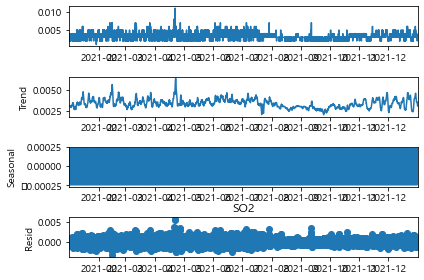

<Figure size 1440x1440 with 0 Axes>

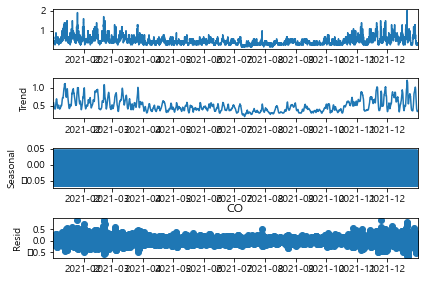

<Figure size 1440x1440 with 0 Axes>

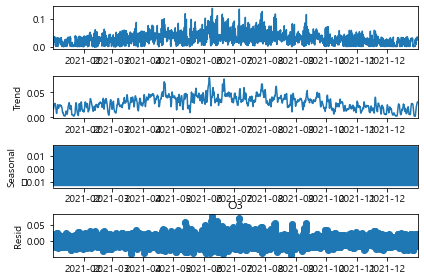

<Figure size 1440x1440 with 0 Axes>

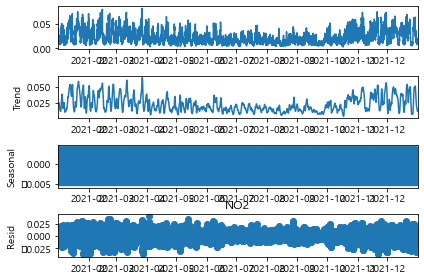

<Figure size 1440x1440 with 0 Axes>

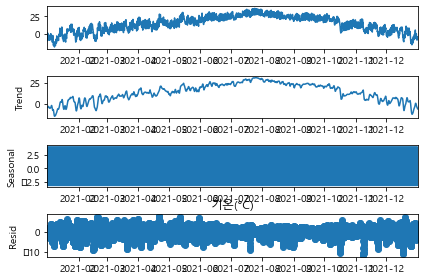

<Figure size 1440x1440 with 0 Axes>

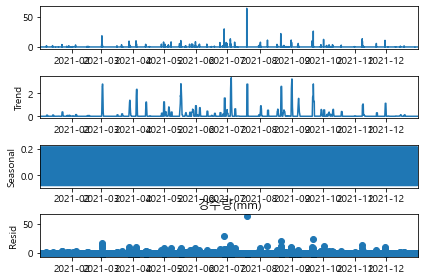

<Figure size 1440x1440 with 0 Axes>

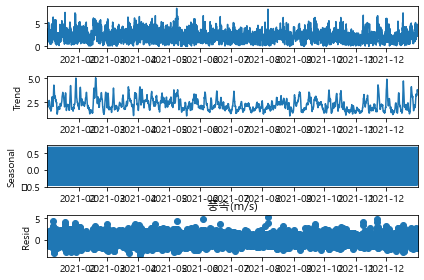

<Figure size 1440x1440 with 0 Axes>

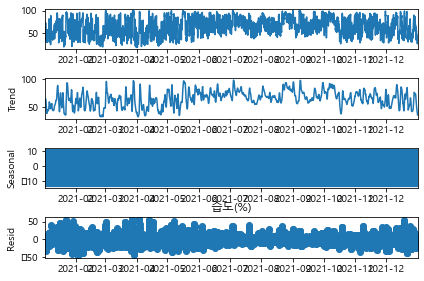

<Figure size 1440x1440 with 0 Axes>

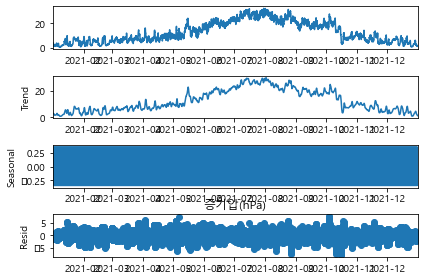

<Figure size 1440x1440 with 0 Axes>

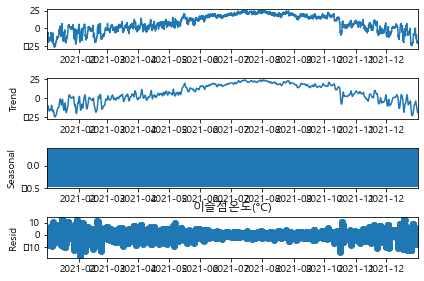

<Figure size 1440x1440 with 0 Axes>

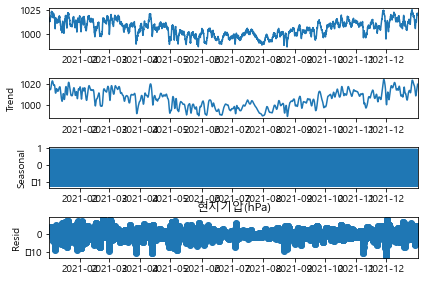

<Figure size 1440x1440 with 0 Axes>

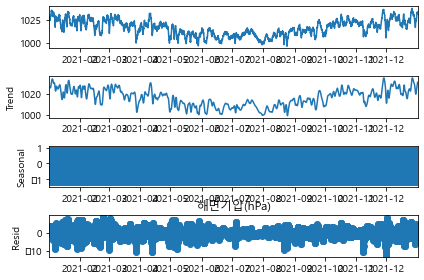

<Figure size 1440x1440 with 0 Axes>

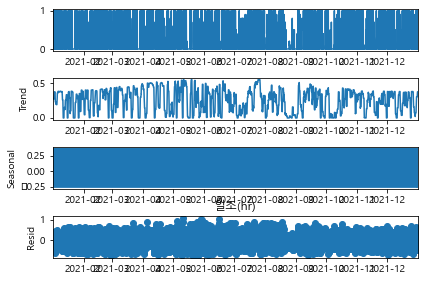

<Figure size 1440x1440 with 0 Axes>

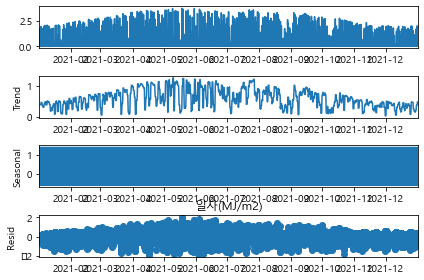

<Figure size 1440x1440 with 0 Axes>

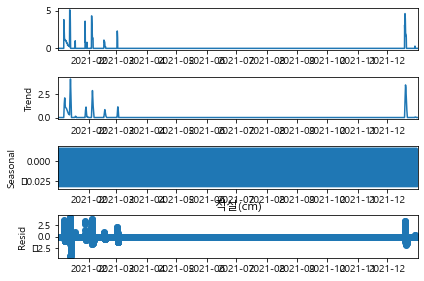

<Figure size 1440x1440 with 0 Axes>

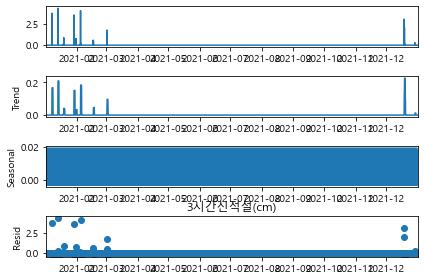

<Figure size 1440x1440 with 0 Axes>

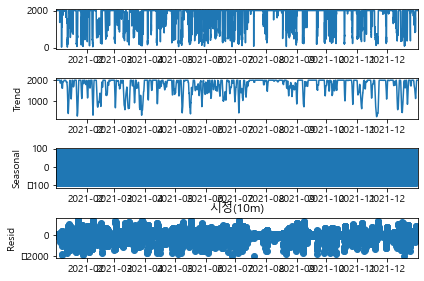

<Figure size 1440x1440 with 0 Axes>

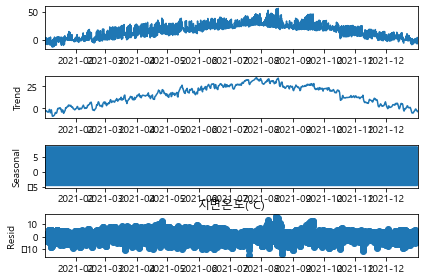

<Figure size 1440x1440 with 0 Axes>

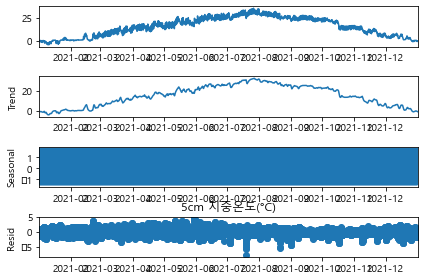

<Figure size 1440x1440 with 0 Axes>

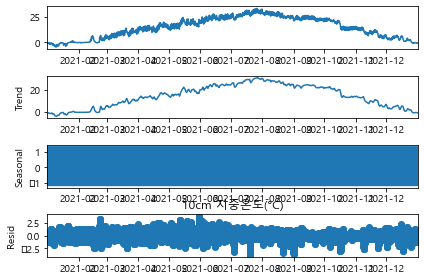

<Figure size 1440x1440 with 0 Axes>

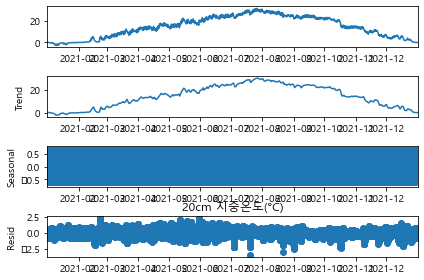

<Figure size 1440x1440 with 0 Axes>

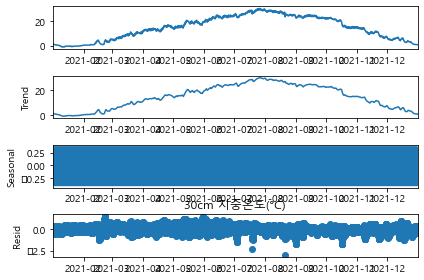

In [6]:
### 모든 train 데이터 칼럼에 대한 시계열 분해 그래프 그리기
for i in train.columns :
    if i not in ['datetime','forecast','풍향(16방위)','전운량(10분위)','중하층운량(10분위)','PM10'] :
        plt.figure(figsize = (20,20))
        seasonal_decompose(train[[i]], model = "additive", two_sided = False).plot()
        plt.title(i)
        plt.show()

### Save the TimeSeries Decomposition Data

In [333]:
### train residual data
resid_train = pd.DataFrame()
for i in train.columns :
    if i not in ['datetime','forecast','풍향(16방위)','전운량(10분위)','중하층운량(10분위)'] :
        result = seasonal_decompose(train[[i]], model = "additive", two_sided = False)
        resid_train[i] = pd.DataFrame(result.resid)['resid']
resid_train = resid_train.reset_index().dropna()
resid_train.reset_index(drop = True, inplace = True)
resid_train.columns = [i + "_r" for i in resid_train.columns]
resid_train.rename(columns = {"datetime_r":"datetime"}, inplace = True)
resid_train.to_csv("C:/dust/model/resid_train.csv", index = False)

### test residual data
test.index = test["datetime"]
resid_test = pd.DataFrame()
for i in test.columns :
    if i not in ['datetime','forecast','풍향(16방위)','전운량(10분위)','중하층운량(10분위)'] :
        result = seasonal_decompose(test[[i]], model = "additive", two_sided = False)
        resid_test[i] = pd.DataFrame(result.resid)['resid']
resid_test = resid_test.reset_index()
resid_test = resid_test.dropna()
resid_test = resid_test[resid_test["datetime"] > "2022-01-01 00:00:00"]
resid_test.reset_index(drop = True, inplace = True)
resid_test.columns = [i + "_r" for i in resid_test.columns]
resid_test.rename(columns = {"datetime_r":"datetime"}, inplace = True)
resid_test.to_csv("C:/dust/model/resid_test.csv", index = False)

### train trend data
trend_train = pd.DataFrame()
for i in train.columns :
    if i not in ['datetime','forecast','풍향(16방위)','전운량(10분위)','중하층운량(10분위)'] :
        result = seasonal_decompose(train[[i]], model = "additive", two_sided = False)
        trend_train[i] = pd.DataFrame(result.trend)['trend']
trend_train = trend_train.reset_index().dropna()
trend_train.reset_index(drop = True, inplace = True)
trend_train.columns = [i + "_t" for i in trend_train.columns]
trend_train.rename(columns = {"datetime_t":"datetime"}, inplace = True)
trend_train.to_csv("C:/dust/model/trend_train.csv", index = False)

### test trend data
trend_test = pd.DataFrame()
for i in test.columns :
    if i not in ['datetime','forecast','풍향(16방위)','전운량(10분위)','중하층운량(10분위)'] :
        result = seasonal_decompose(test[[i]], model = "additive", two_sided = False)
        trend_test[i] = pd.DataFrame(result.trend)['trend']
trend_test = trend_test.reset_index()
trend_test = trend_test.dropna()
trend_test = trend_test[trend_test["datetime"] > "2022-01-01 00:00:00"]
trend_test.reset_index(drop = True, inplace = True)
trend_test.columns = [i + "_t" for i in trend_test.columns]
trend_test.rename(columns = {"datetime_t":"datetime"}, inplace = True)
trend_test.to_csv("C:/dust/model/trend_test.csv", index = False)

### train seasonal data
seasonal_train = pd.DataFrame()
for i in train.columns :
    if i not in ['datetime','forecast','풍향(16방위)','전운량(10분위)','중하층운량(10분위)'] :
        result = seasonal_decompose(train[[i]], model = "additive", two_sided = False)
        seasonal_train[i] = pd.DataFrame(result.seasonal)['seasonal']
seasonal_train = seasonal_train.reset_index().dropna()
seasonal_train.reset_index(drop = True, inplace = True)
seasonal_train.columns = [i + "_s" for i in seasonal_train.columns]
seasonal_train.rename(columns = {"datetime_s":"datetime"}, inplace = True)
seasonal_train.to_csv("C:/dust/model/seasonal_train.csv", index = False)

### test seasonal data
seasonal_test = pd.DataFrame()
for i in test.columns :
    if i not in ['datetime','forecast','풍향(16방위)','전운량(10분위)','중하층운량(10분위)'] :
        result = seasonal_decompose(test[[i]], model = "additive", two_sided = False)
        seasonal_test[i] = pd.DataFrame(result.seasonal)['seasonal']
seasonal_test = seasonal_test.reset_index()
seasonal_test = seasonal_test.dropna()
seasonal_test = seasonal_test[seasonal_test["datetime"] > "2022-01-01 00:00:00"]
seasonal_test.reset_index(drop = True, inplace = True)
seasonal_test.columns = [i + "_s" for i in seasonal_test.columns]
seasonal_test.rename(columns = {"datetime_s":"datetime"}, inplace = True)
seasonal_test.to_csv("C:/dust/model/seasonal_test.csv", index = False)